# Playground for Advanced Topics Slides - FE

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2021-11-19 15:20:17.921820


In [2]:
pip install category_encoders numexpr

     |████████████████████████████████| 82 kB 187 kB/s 


In [3]:
pip install pandas --upgrade

     |████████████████████████████████| 11.3 MB 8.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [4]:
pip install featuretools

     |████████████████████████████████| 335 kB 9.8 MB/s 
     |████████████████████████████████| 596 kB 51.4 MB/s 
     |████████████████████████████████| 150 kB 64.8 MB/s 
     |████████████████████████████████| 296 kB 72.3 MB/s 
     |████████████████████████████████| 793 kB 63.5 MB/s 
     |████████████████████████████████| 1.0 MB 44.4 MB/s 
     |████████████████████████████████| 132 kB 74.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully

In [2]:
import sklearn
sklearn.__version__

'1.0.1'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# disable chained assignments
pd.options.mode.chained_assignment = None 

# Load Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/stepthom/869_course/main/data/GermanCredit.csv')
df['Class'] = df['Class'].map({'Good': 1, 'Bad': 0})
df['Salary'] = df['Amount']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   Class                                   1000 non-null   int64
 10  CheckingAccountStatus.lt.0              1000 non-null   int64
 11  CheckingAccountSta

Duration  Amount  ...  Job.Management.SelfEmp.HighlyQualified  Salary
0         6    1169  ...                                       0    1169
1        48    5951  ...                                       0    5951
2        12    2096  ...                                       0    2096
3        42    7882  ...                                       0    7882
4        24    4870  ...                                       0    4870

[5 rows x 63 columns]

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

In [50]:
#Create a feature with some missing data 
X_train = pd.DataFrame(data={
                         'Age': [34, 54, 29, 28, 53, 45, 32, 98, 34, 23, 21, 47, 76, 45, 30],
                         'Income': [np.NAN, 6836, 2319, 1236, 5003, 886, 1442, 2978, np.NAN, 5400, np.NAN, 2996, 3780, 4211, 8543],
                         })
X_train

#Create a feature with some missing data 
X_test = pd.DataFrame(data={
                         'Age': [76, 45, 30],
                         'Income': [np.NAN, 6836, 5415],
                         })

Age  Income
0    34     NaN
1    54  6836.0
2    29  2319.0
3    28  1236.0
4    53  5003.0
5    45   886.0
6    32  1442.0
7    98  2978.0
8    34     NaN
9    23  5400.0
10   21     NaN
11   47  2996.0
12   76  3780.0
13   45  4211.0
14   30  8543.0

## Simple Imputation

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer = imputer.fit(X_train[['Income']])

X_train['Income_Imputed'] = imputer.transform(X_train[["Income"]])
X_test['Income_Imputed'] = imputer.transform(X_test[['Income']])

In [52]:
X_train[["Income_Imputed"]]

Income_Imputed
0           3802.5
1           6836.0
2           2319.0
3           1236.0
4           5003.0
5            886.0
6           1442.0
7           2978.0
8           3802.5
9           5400.0
10          3802.5
11          2996.0
12          3780.0
13          4211.0
14          8543.0

In [53]:
X_test[["Income_Imputed"]]

Income_Imputed
0          3802.5
1          6836.0
2          5415.0

In [54]:
imputer.statistics_

array([3802.5])

## Multiple Imputation

In [72]:
#Create a feature with some missing data 
X_train = pd.DataFrame(data={
                         'Age':    [34, 54, 29, 28, 53, 25, 32, 68, 30, 23, 51, 47, 76, 45, 30],
                         'Income': [np.NAN, 6836, 2319, 1236, 5003, 886, 2442, 2978, np.NAN, 5400, np.NAN, 5996, 5780, 4211, 3543],
                         })
X_train

#Create a feature with some missing data 
X_test = pd.DataFrame(data={
                         'Age': [66, 45, 30],
                         'Income': [np.NAN, 6836, 5415],
                         })

X_test

Age  Income
0    34     NaN
1    54  6836.0
2    29  2319.0
3    28  1236.0
4    53  5003.0
5    25   886.0
6    32  2442.0
7    68  2978.0
8    30     NaN
9    23  5400.0
10   51     NaN
11   47  5996.0
12   76  5780.0
13   45  4211.0
14   30  3543.0

Age  Income
0   66     NaN
1   45  6836.0
2   30  5415.0

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

imputer = IterativeImputer(estimator=LinearRegression())
imputer = imputer.fit(X_train)

imputer.transform(X_train)

array([[  34.        , 3388.27590788],
       [  54.        , 6836.        ],
       [  29.        , 2319.        ],
       [  28.        , 1236.        ],
       [  53.        , 5003.        ],
       [  25.        ,  886.        ],
       [  32.        , 2442.        ],
       [  68.        , 2978.        ],
       [  30.        , 3154.13123708],
       [  23.        , 5400.        ],
       [  51.        , 4383.39075878],
       [  47.        , 5996.        ],
       [  76.        , 5780.        ],
       [  45.        , 4211.        ],
       [  30.        , 3543.        ]])

In [68]:
imputer.transform(X_test)

array([[  66.        , 5261.43327428],
       [  45.        , 6836.        ],
       [  30.        , 5415.        ]])

LinearRegression()

## Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Helper function to make a nice-looking histogram

def plot_hist(feature, title):
    plt.figure(figsize=(8, 5));
    plt.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    plt.title(title, fontsize=20);
    #ax.tick_params(axis='both', which='major', labelsize=18);
    plt.grid(True);

In [ ]:
X_train[['Salary']].head(10)

Salary
29     6836
535    2319
695    1236
557    5003
836     886
596    1442
165    2978
918    2359
495    2996
824    3780

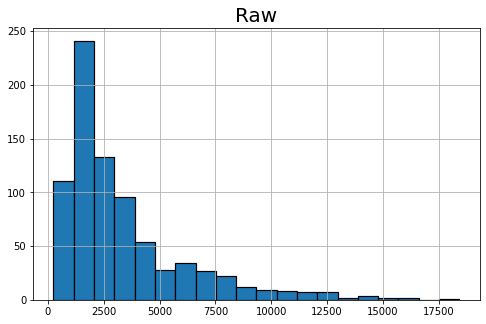

In [ ]:
plot_hist(X_train['Salary'], "Raw");

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_Std'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Std'] = scaler.transform(X_test[['Salary']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train[['Salary_Std']].head(10)

Salary_Std
29     1.199912
535   -0.359630
695   -0.733547
557    0.567050
836   -0.854388
596   -0.662423
165   -0.132103
918   -0.345819
495   -0.125888
824    0.144796

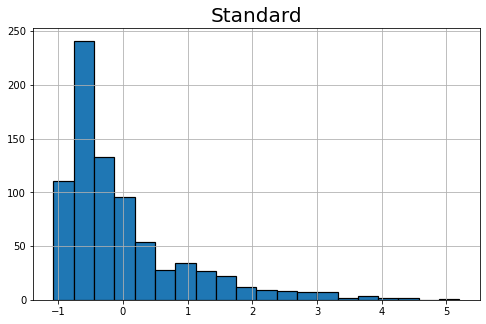

In [ ]:
plot_hist(X_train['Salary_Std'], "Standard");

## MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Salary']])

X_train['Salary_MinMax'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_MinMax'] = scaler.transform(X_test[['Salary']])   

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train[['Salary_MinMax']].head(10)

Salary_MinMax
29        0.362386
535       0.113844
695       0.054253
557       0.261527
836       0.034995
596       0.065588
165       0.150105
918       0.116045
495       0.151095
824       0.194234

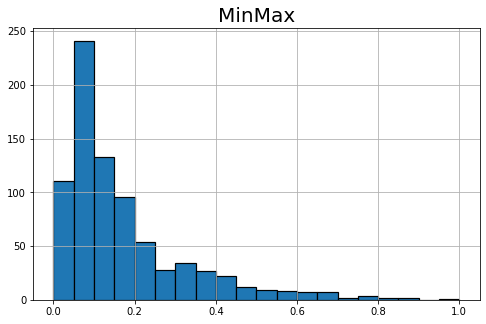

In [ ]:
plot_hist(X_train['Salary_MinMax'], "MinMax");

## Log

In [ ]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_train[['Salary']])
X_train['Salary_Log'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_Log'] = scaler.transform(X_test[['Salary']]) 

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                    kw_args=None, validate=True)

In [ ]:
X_train[['Salary_Log']].head(10)

Salary_Log
29     8.830104
535    7.749322
695    7.120444
557    8.517993
836    6.787845
596    7.274480
165    7.999343
918    7.766417
495    8.005367
824    8.237744

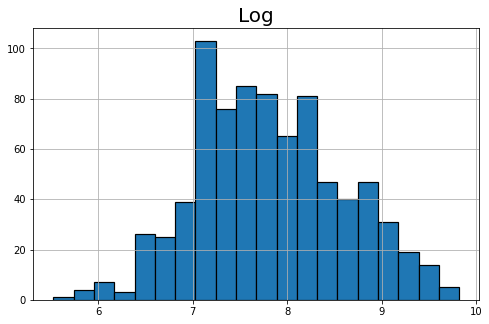

In [ ]:
plot_hist(X_train['Salary_Log'], "Log");

## Box-Cox

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox')
scaler.fit(X_train[['Salary']])
X_train['Salary_BoxCox'] = scaler.transform(X_train[['Salary']])   
X_test['Salary_BoxCox'] = scaler.transform(X_test[['Salary']]) 

PowerTransformer(copy=True, method='box-cox', standardize=True)

In [ ]:
X_train[['Salary_BoxCox']].head(10)

Salary_BoxCox
29        1.291730
535      -0.054503
695      -0.893962
557       0.914991
836      -1.355653
596      -0.684355
165       0.267494
918      -0.032279
495       0.275172
824       0.568502

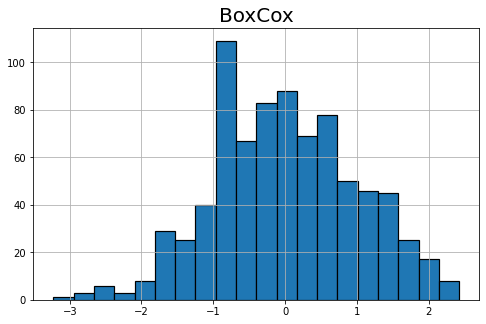

In [ ]:
plot_hist(X_train['Salary_BoxCox'], "BoxCox");

## Yeo-Johnson

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train[['Salary']])
X_train['Salary_YeoJohnson'] = scaler.transform(X_train[['Salary']])  

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [ ]:
X_train[['Salary_YeoJohnson']].head(10)

Salary_YeoJohnson
29            1.291774
535          -0.054483
695          -0.894055
557           0.915073
836          -1.355755
596          -0.684425
165           0.267553
918          -0.032256
495           0.275232
824           0.568584

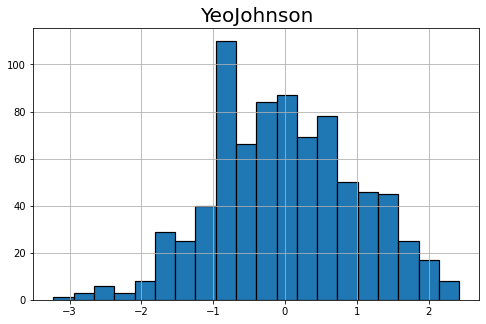

In [ ]:
plot_hist(X_train['Salary_YeoJohnson'], "YeoJohnson");

## Binning

In [ ]:
# TODO

# Categorical Features


We will create a little fake dataset to help illustrate how the different encoding schemes work.

In [ ]:
train_df = pd.DataFrame(data={
    
                          # An ID and two categorical features to play around with
                         'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                         'Province': ['ON', 'QB', 'AB', 'ON', 'ON', 'BC', 'BC', 'QB', 'AB', 'ON', 'QB', 'AB', 'ON', 'ON', 'ON'],
                         'Income': ['Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'High', 'High'],

                         # We'll make one binary target
                         'Default': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],

                         # And one multi-label target (for testing below)
                         'Risk': [1, 1, 2, 2,    0, 0, 1, 1, 1, 2,    0, 0, 0, 1, 1],
                         })

train_df
X_train = train_df.drop(['Default', 'Risk'], axis=1)
y_train1 = train_df['Default']
y_train2 = train_df['Risk']

ID Province  Income  Default  Risk
0    1       ON     Low        0     1
1    2       QB     Low        1     1
2    3       AB     Low        1     2
3    4       ON     Low        1     2
4    5       ON  Medium        0     0
5    6       BC  Medium        0     0
6    7       BC  Medium        0     1
7    8       QB  Medium        1     1
8    9       AB  Medium        1     1
9   10       ON  Medium        1     2
10  11       QB    High        0     0
11  12       AB    High        0     0
12  13       ON    High        0     0
13  14       ON    High        0     1
14  15       ON    High        1     1

In [ ]:
X_test = pd.DataFrame(data={'ID': [101, 102, 103, 104], 
                         'Province': ['ON', 'QB', 'AB', 'ON'],
                         'Income': ['Low', 'Low', 'Medium', 'High'],
                             })

X_test

ID Province  Income
0  101       ON     Low
1  102       QB     Low
2  103       AB  Medium
3  104       ON    High

## One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc = enc.fit(X_train[['Province']])

enc.transform(X_train[['Province']])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
# If you want it back into the original pandas dataframe...

_ohe_array = enc.transform(X_train[['Province']])
_ohe_names = enc.get_feature_names()
for i in range(_ohe_array.shape[1]):
  X_train[_ohe_names[i]] = _ohe_array[:,i]

X_train

ID Province  Income  x0_AB  x0_BC  x0_ON  x0_QB
0    1       ON     Low    0.0    0.0    1.0    0.0
1    2       QB     Low    0.0    0.0    0.0    1.0
2    3       AB     Low    1.0    0.0    0.0    0.0
3    4       ON     Low    0.0    0.0    1.0    0.0
4    5       ON  Medium    0.0    0.0    1.0    0.0
5    6       BC  Medium    0.0    1.0    0.0    0.0
6    7       BC  Medium    0.0    1.0    0.0    0.0
7    8       QB  Medium    0.0    0.0    0.0    1.0
8    9       AB  Medium    1.0    0.0    0.0    0.0
9   10       ON  Medium    0.0    0.0    1.0    0.0
10  11       QB    High    0.0    0.0    0.0    1.0
11  12       AB    High    1.0    0.0    0.0    0.0
12  13       ON    High    0.0    0.0    1.0    0.0
13  14       ON    High    0.0    0.0    1.0    0.0
14  15       ON    High    0.0    0.0    1.0    0.0

In [ ]:
enc.transform(X_test[['Province']])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

## Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc = enc.fit(X_train[['Income']])

X_train['Income_Ord'] = enc.transform(X_train[['Income']])

In [ ]:
X_train

ID Province  Income  x0_AB  x0_BC  x0_ON  x0_QB  Income_Ord
0    1       ON     Low    0.0    0.0    1.0    0.0         1.0
1    2       QB     Low    0.0    0.0    0.0    1.0         1.0
2    3       AB     Low    1.0    0.0    0.0    0.0         1.0
3    4       ON     Low    0.0    0.0    1.0    0.0         1.0
4    5       ON  Medium    0.0    0.0    1.0    0.0         2.0
5    6       BC  Medium    0.0    1.0    0.0    0.0         2.0
6    7       BC  Medium    0.0    1.0    0.0    0.0         2.0
7    8       QB  Medium    0.0    0.0    0.0    1.0         2.0
8    9       AB  Medium    1.0    0.0    0.0    0.0         2.0
9   10       ON  Medium    0.0    0.0    1.0    0.0         2.0
10  11       QB    High    0.0    0.0    0.0    1.0         0.0
11  12       AB    High    1.0    0.0    0.0    0.0         0.0
12  13       ON    High    0.0    0.0    1.0    0.0         0.0
13  14       ON    High    0.0    0.0    1.0    0.0         0.0
14  15       ON    High    0.0    0.0    1.0    0.0         0.0

In [ ]:
enc.categories_

[array(['High', 'Low', 'Medium'], dtype=object)]

In [ ]:
enc.transform(X_test[['Income']])

array([[1.],
       [1.],
       [2.],
       [0.]])

We could also force the categories to be in a certain order:

In [ ]:
enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
enc = enc.fit(X_train[['Income']])

enc.transform(X_train[['Income']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [ ]:
enc.categories_

[array(['Low', 'Medium', 'High'], dtype=object)]

In [ ]:
enc.transform(X_test[['Income']])

array([[0.],
       [0.],
       [1.],
       [2.]])

## Target Encoding

In [ ]:
train_df

ID Province  Income  Default
0    1       ON     Low        0
1    2       QB     Low        1
2    3       AB     Low        1
3    4       ON     Low        1
4    5       ON  Medium        0
5    6       BC  Medium        0
6    7       BC  Medium        0
7    8       QB  Medium        1
8    9       AB  Medium        1
9   10       ON  Medium        1
10  11       QB    High        0
11  12       AB    High        0
12  13       ON    High        0
13  14       ON    High        0
14  15       ON    High        1

In [ ]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

enc = ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True)
enc.fit(X_train[['Income']], y_train1)

enc.transform(X_train[['Income']])

TargetEncoder(cols=['Income'], drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=0.0, verbose=0)

Income
0     0.75
1     0.75
2     0.75
3     0.75
4     0.50
5     0.50
6     0.50
7     0.50
8     0.50
9     0.50
10    0.20
11    0.20
12    0.20
13    0.20
14    0.20

In [ ]:
enc.transform(X_test[['Income']])

Income
0    0.75
1    0.75
2    0.50
3    0.20

## Target Encoding with A Multi-label Target

In [ ]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

enc = PolynomialWrapper(ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True))
enc.fit(X_train[['Income']], y_train2)

enc.transform(X_train[['Income']])

/usr/local/lib/python3.7/dist-packages/category_encoders/one_hot.py:270: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(col, 1, inplace=True)


Income_2.0  Income_0.0
0     0.500000    0.000000
1     0.500000    0.000000
2     0.500000    0.000000
3     0.500000    0.000000
4     0.166667    0.333333
5     0.166667    0.333333
6     0.166667    0.333333
7     0.166667    0.333333
8     0.166667    0.333333
9     0.166667    0.333333
10    0.000000    0.600000
11    0.000000    0.600000
12    0.000000    0.600000
13    0.000000    0.600000
14    0.000000    0.600000

## Contrasts

In [ ]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

# Aggregations

In [ ]:
import featuretools as ft

# Let's load a different kind of dataset - one that has lots of transactions

es = ft.demo.load_mock_customer(return_entityset=True)
es

In [ ]:
es["transactions"].df.head(30)

In [ ]:
feature_matrix, features = ft.dfs(entityset=es,
                                   target_entity="customers",
                                   verbose=True)
feature_matrix

In [ ]:
list(feature_matrix)

In [ ]:
ft.list_primitives() 